<a href="https://colab.research.google.com/github/abdullaziz-0/T5_repo/blob/main/Weekly_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [266]:
df=pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [267]:
print(df.duplicated().sum())
print(df.isna().sum())


0
Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality         

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [268]:
columns_to_fill_mode = [
    'Educational_level', 'Age_band_of_driver', 'Vehicle_driver_relation',
    'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle',
    'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
    'Types_of_Junction', 'Road_surface_type', 'Vehicle_movement', 'Type_of_collision'
]

for column in columns_to_fill_mode:
    df[column].fillna(df[column].mode()[0], inplace=True)


df=df.drop('Service_year_of_vehicle',axis=1)
df=df.drop('Defect_of_vehicle',axis=1)
df=df.drop('Work_of_casuality',axis=1)
df=df.drop('Fitness_of_casuality',axis=1)
df.isnull().sum()




,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Area_accident_occured,0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

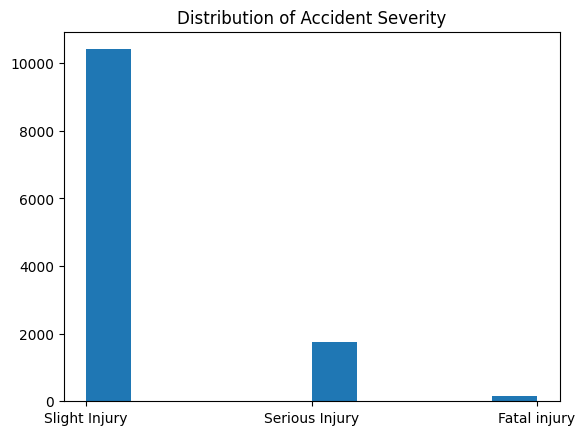

In [269]:
plt.hist(x='Accident_severity', data=df)
plt.title('Distribution of Accident Severity')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [270]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

target_column = 'Accident_severity'
features = df.drop(columns=[target_column])
target = df[target_column]

label_encoders = {}

for col in features.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    features[col] = label_encoders[col].fit_transform(features[col])
train_features, test_features, train_labels, test_labels = train_test_split(
    features, target, test_size=0.3, random_state=42
)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver="lbfgs", random_state=42)
logistic_model.fit(train_features, train_labels)
logistic_predictions = logistic_model.predict(test_features)
logistic_probabilities = logistic_model.predict_proba(test_features)[:, 1]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [272]:

from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42,min_samples_leaf=10,)
tree_model.fit(train_features, train_labels)
y_pred_tree = tree_model.predict(test_features)
y_pred_prob_tree = tree_model.predict_proba(test_features)[:, 1]

#### Support Vector Machine (SVM)

In [273]:
from sklearn.svm import SVC
svm_model = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    random_state=42,probability=True
)
svm_model.fit(train_features, train_labels)

y_pred_svm = svm_model.predict(test_features)
y_pred_prob_svm = svm_model.predict_proba(test_features)[:, 1]
svm_model = SVC(C=1.0,kernel='rbf',gamma='scale',random_state=42)

#### K-Neighbors Classifier

In [274]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(
    n_neighbors=5,
    weights='uniform',
)
knn_model.fit(train_features, train_labels)

y_pred_knn = knn_model.predict(test_features)
y_pred_prob_knn = knn_model.predict_proba(test_features)[:, 1]



## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [275]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix

accuracy_logistic = accuracy_score(test_labels, logistic_predictions)
precision_logistic = precision_score(test_labels, logistic_predictions, average='weighted')
recall_logistic = recall_score(test_labels, logistic_predictions, average='weighted')
f1_logistic = f1_score(test_labels, logistic_predictions, average='weighted')
conf_matrix_logistic = confusion_matrix(test_labels, logistic_predictions)
fpr_logistic, tpr_logistic, _ = roc_curve(test_labels, logistic_probabilities, pos_label=logistic_model.classes_[1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")
print(f"F1 Score: {f1_logistic}")
print("Confusion Matrix:")
print(conf_matrix_logistic)

# Decision Tree Classifier
accuracy_decision_tree = accuracy_score(test_labels, y_pred_tree)
precision_decision_tree = precision_score(test_labels, y_pred_tree, average='weighted')
recall_decision_tree = recall_score(test_labels, y_pred_tree, average='weighted')
f1_decision_tree = f1_score(test_labels, y_pred_tree, average='weighted')
conf_matrix_decision_tree = confusion_matrix(test_labels, y_pred_tree)


print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_decision_tree}")
print(f"Precision: {precision_decision_tree}")
print(f"Recall: {recall_decision_tree}")
print(f"F1 Score: {f1_decision_tree}")
print("Confusion Matrix:")
print(conf_matrix_decision_tree)

accuracy_svm = accuracy_score(test_labels, y_pred_svm)
precision_svm = precision_score(test_labels, y_pred_svm, average='weighted')
recall_svm = recall_score(test_labels, y_pred_svm, average='weighted')
f1_svm = f1_score(test_labels, y_pred_svm, average='weighted')
conf_matrix_svm = confusion_matrix(test_labels, y_pred_svm)


print("Support Vector Machine (SVM):")
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print("Confusion Matrix:")
print(conf_matrix_svm)

accuracy_knn = accuracy_score(test_labels, y_pred_knn)
precision_knn = precision_score(test_labels, y_pred_knn, average='weighted')
recall_knn = recall_score(test_labels, y_pred_knn, average='weighted')
f1_knn = f1_score(test_labels, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(test_labels, y_pred_knn)


print("K-Neighbors Classifier:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1 Score: {f1_knn}")
print("Confusion Matrix:")
print(conf_matrix_knn)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression:
Accuracy: 0.8365358592692829
Precision: 0.6997922438433973
Recall: 0.8365358592692829
F1 Score: 0.7620784972005167
Confusion Matrix:
[[   0    0   52]
 [   0    0  552]
 [   0    0 3091]]
Decision Tree Classifier:
Accuracy: 0.801894451962111
Precision: 0.771817790592168
Recall: 0.801894451962111
F1 Score: 0.7812801458814883
Confusion Matrix:
[[   3   10   39]
 [   2  115  435]
 [   0  246 2845]]
Support Vector Machine (SVM):
Accuracy: 0.8365358592692829
Precision: 0.6997922438433973
Recall: 0.8365358592692829
F1 Score: 0.7620784972005167
Confusion Matrix:
[[   0    0   52]
 [   0    0  552]
 [   0    0 3091]]
K-Neighbors Classifier:
Accuracy: 0.823274695534506
Precision: 0.7582776295215141
Recall: 0.823274695534506
F1 Score: 0.7747400020457695
Confusion Matrix:
[[   3    6   43]
 [   1   42  509]
 [   2   92 2997]]


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Comparative Analysis:

Compare Metrics: Decision Tree Classifier has the highest F1 score (0.781) indicating better balance between precision and recall.
Evaluate Trade-offs: Logistic Regression and SVM are computationally efficient but less interpretable compared to Decision Tree.
Justify Your Choice: Decision Tree is preferred due to its higher F1 score, offering a better balance of precision and recall for the dataset.
Feature Importance: Decision Tree's feature importance can be easily visualized and interpreted, impacting predictions by highlighting key features.
Model Limitations: All models struggled with predicting minority classes, as indicated by the confusion matrices and undefined precision warnings.
Future Improvements: Consider trying ensemble methods like Random Forest or Gradient Boosting, and performing hyperparameter tuning to enhance model performance.